# Chapter 2: Introduction to Gymnasium

## What is Gymnasium?

[Gymnasium](https://github.com/Farama-Foundation/Gymnasium) is the modern successor to OpenAI's Gym library, which became the de facto standard for reinforcement learning environments when it was first released in 2017. In 2021, development moved to the Farama Foundation, creating Gymnasium as a drop-in replacement that maintains the same API while providing ongoing support and improvements.

The primary purpose of Gymnasium is to provide a unified interface for reinforcement learning experiments through a rich collection of environments. This standardization allows researchers and practitioners to write code that works across different RL scenarios, from simple grid worlds to complex robotic simulations.

## Core Components

Every Gymnasium environment is built around three fundamental concepts:

### 1. Action Space
The **action space** defines what actions an agent can take in the environment:

- **Discrete actions**: A finite set of mutually exclusive choices (e.g., moving left, right, up, or down in a grid)
- **Continuous actions**: Actions with continuous values within specified bounds (e.g., steering wheel angle from -720° to +720°)
- **Combined actions**: Multiple actions that can be executed simultaneously

### 2. Observation Space  
The **observation space** specifies what information the environment provides to the agent at each timestep. Observations can range from simple numerical values to complex multi-dimensional data like images from multiple cameras.

### 3. Environment Interface
The core environment class (`Env`) provides two essential methods:

- **`reset()`**: Initializes the environment to its starting state and returns the first observation
- **`step(action)`**: Executes an action and returns:
  - Next observation
  - Reward earned
  - Episode termination flag (`done`)
  - Episode truncation flag (`truncated`) 
  - Additional environment information (`info`)

## Common Space Types

Gymnasium uses `Space` classes to formally define action and observation spaces:

- **`Discrete(n)`**: Represents n mutually exclusive options (0 to n-1)
- **`Box(low, high, shape)`**: Represents continuous values within bounds, with specified dimensions
- **`Tuple`**: Combines multiple spaces for complex scenarios

### Space Class Hierarchy

The following diagram shows the inheritance structure of Gymnasium's Space classes:

```mermaid
classDiagram
    class Space {
        +shape: Tuple[int, ...]
        +sample()
        +contains(x)
        +seed()
    }
    
    class Box {
        +low: float
        +high: float
    }
    
    class Discrete {
        +n: int
    }
    
    class Tuple {
        +spaces: Tuple[Space, ...]
    }
    
    Space <|-- Box
    Space <|-- Discrete
    Space <|-- Tuple
```

**Figure 2.1**: The hierarchy of the Space class in Gymnasium. The abstract Space class provides the foundation with core methods like `sample()`, `contains()`, and `seed()`, while its subclasses (Box, Discrete, and Tuple) implement specific types of action and observation spaces.

## Basic Workflow

The typical interaction pattern with a Gymnasium environment follows this loop:

1. Create and initialize the environment
2. Call `reset()` to get the initial observation
3. In a loop:
   - Choose an action based on the current observation
   - Call `step(action)` to execute the action
   - Receive new observation, reward, and termination flags
   - Continue until episode ends (`done` or `truncated` is True)
4. Reset and repeat for new episodes

This standardized interface makes it easy to test different algorithms across various environments and ensures reproducible research in reinforcement learning.

# Cartpole example

The CartPole environment is a classic control problem where the goal is to balance a pole attached to a movable cart. Let's examine its action and observation spaces to understand how an agent interacts with this environment.

### The CartPole Task

CartPole involves controlling a platform with a pole (stick) attached to its center. The pole tends to fall left or right due to gravity, and the agent must move the platform horizontally to keep the pole balanced. The episode continues until the pole falls beyond a certain angle or the cart moves too far from the center.

### Action Space

The CartPole environment has a **discrete action space** with only two possible actions:

- **Action 0**: Push the cart to the left
- **Action 1**: Push the cart to the right

This is represented as `Discrete(2)`, meaning the agent can choose from 2 mutually exclusive actions at each timestep.

### Observation Space

The observation space is a **Box** space containing 4 continuous values that describe the current state of the system:

1. **Cart Position** (`x`): The horizontal position of the cart
   - Range: [-4.8, 4.8] (approximate)
   - Units: meters from center

2. **Cart Velocity** (`ẋ`): The horizontal velocity of the cart  
   - Range: [-∞, ∞]
   - Units: meters per second

3. **Pole Angle** (`θ`): The angle of the pole from vertical
   - Range: [-0.418, 0.418] radians (approximately ±24°)
   - Positive values mean the pole is leaning right

4. **Pole Angular Velocity** (`θ̇`): The rate of change of the pole angle
   - Range: [-∞, ∞] 
   - Units: radians per second

### Reward Structure

- **Reward**: +1 for every timestep the pole remains upright
- **Episode Termination**: When the pole angle exceeds ±12° or cart position exceeds ±2.4 units
- **Goal**: Maximize cumulative reward by keeping the pole balanced as long as possible

The challenge for reinforcement learning is to learn the optimal balancing strategy using only these numerical observations and the reward signal, without explicit knowledge of the physics involved.

## Random policy (matplotlib viz)

Episode done in 14 steps, total reward 14.00


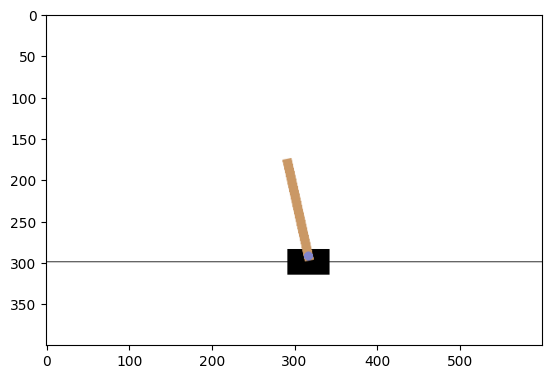

In [7]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display

# Initialize the environment with the render mode set to rgb_array (which enables rendering).
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Reset the environment to get the initial state.
observation, info = env.reset()

total_reward = 0.0
total_steps = 0
for _ in range(100):
    # Sample a random action from the action space.
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    # Render and display the image
    img = env.render()
    plt.imshow(img)
    display.display(plt.gcf())
    display.clear_output(wait=True)

    # Update the total reward and steps.
    total_reward += reward
    total_steps += 1

    if terminated or truncated:
        print(f"Episode done in {total_steps} steps, total reward {total_reward:.2f}")
        break

env.close()

## Random policy (gym-notebook-wrapper)

[gym-notebook-wrapper API documentation](https://pypi.org/project/gym-notebook-wrapper/)

In [ ]:
import gymnasium as gym
import gnwrapper

env = gnwrapper.LoopAnimation(gym.make("CartPole-v1", render_mode="rgb_array"))
obs, info = env.reset()

for _ in range(100):
    action = env.action_space.sample()
    next_obs, reward, terminated, truncated, info = env.step(action)
    env.render()  # Stores the frame for animation
    obs = next_obs
    if terminated or truncated:
        obs, info = env.reset()

env.display()  # Displays the looping animation
env.close()

# Environment Wrappers

Gymnasium's wrapper system provides a powerful way to extend and modify environment functionality without changing the underlying environment code. Wrappers allow you to:

- **Preprocess observations** (e.g., normalize, crop, stack frames)
- **Modify rewards** (e.g., scale, clip, add bonuses)
- **Transform actions** (e.g., add noise, discretize continuous actions)
- **Add monitoring capabilities** (e.g., record videos, log statistics)
- **Implement exploration strategies** (e.g., epsilon-greedy action selection)

## Wrapper Class Hierarchy

The wrapper system is built around a hierarchy of classes that inherit from the base `Env` class:

- **`Wrapper`**: Base wrapper class that can modify any aspect of the environment
- **`ObservationWrapper`**: Specialized for modifying observations
- **`RewardWrapper`**: Specialized for modifying rewards  
- **`ActionWrapper`**: Specialized for modifying actions

Each wrapper "wraps" an existing environment and can be stacked with other wrappers to create complex preprocessing pipelines.

## Types of Wrappers

### ObservationWrapper
Used when you want to modify the observations returned by the environment. You override the `observation(obs)` method to transform observations before they reach the agent.

**Common use cases:**
- Normalizing pixel values
- Cropping or resizing images
- Stacking multiple frames
- Adding noise to observations

### RewardWrapper  
Used to modify the reward signal. You override the `reward(rew)` method to transform rewards.

**Common use cases:**
- Scaling rewards to a specific range
- Clipping extreme reward values
- Adding shaped rewards or bonuses
- Normalizing rewards across episodes

### ActionWrapper
Used to modify actions before they're sent to the environment. You override the `action(action)` method.

**Common use cases:**
- Adding exploration noise
- Discretizing continuous action spaces
- Implementing action repeat
- Adding action constraints

## Rendering Wrappers

Gymnasium provides specialized wrappers for monitoring and recording environment interactions. These replace the older Monitor wrapper from OpenAI Gym.

### HumanRendering Wrapper
Opens a graphical window to display the environment in real-time. Useful for:
- Debugging agent behavior visually
- Creating demonstrations
- Real-time monitoring during training

### RecordVideo Wrapper  
Captures environment frames and creates video files of agent episodes. Useful for:
- Creating training videos
- Recording best-performing episodes
- Documentation and presentations
- Remote monitoring (when GUI is not available)

**Important**: Both wrappers require the environment to be created with `render_mode="rgb_array"` to access pixel data.


## Built-in Wrappers in Gymnasium

Gymnasium provides many pre-built wrappers for common use cases:

### Observation Wrappers
- **`ResizeObservationWrapper`**: Resize image observations
- **`GrayScaleObservation`**: Convert RGB images to grayscale
- **`FrameStackObservation`**: Stack multiple consecutive frames
- **`FlattenObservation`**: Flatten multi-dimensional observations
- **`NormalizeObservation`**: Normalize observations with running statistics

### Action Wrappers
- **`ClipAction`**: Clip continuous actions to valid ranges
- **`RescaleAction`**: Rescale actions from one range to another

### Reward Wrappers  
- **`ClipReward`**: Clip rewards to a specified range
- **`NormalizeReward`**: Normalize rewards with running statistics

### Utility Wrappers
- **`TimeLimit`**: Limit episode length
- **`AutoResetWrapper`**: Automatically reset environment when episodes end
- **`RecordEpisodeStatistics`**: Track episode statistics (length, reward)

### Atari-specific Wrappers
- **`AtariPreprocessing`**: Standard preprocessing for Atari games
- **`FrameSkipWrapper`**: Skip frames and repeat actions
- **`StickyActionWrapper`**: Occasionally repeat previous actions

## Key Benefits of Wrappers

1. **Modularity**: Each wrapper has a single responsibility
2. **Reusability**: Wrappers work with any compatible environment
3. **Composability**: Multiple wrappers can be stacked together
4. **Standardization**: Common preprocessing patterns are pre-implemented
5. **Flexibility**: Easy to create custom wrappers for specific needs

## Best Practices

- **Order matters**: The sequence of wrapper stacking affects the final behavior
- **Keep it simple**: Use existing wrappers when possible before creating custom ones
- **Document changes**: Clearly document what each wrapper modifies
- **Test thoroughly**: Wrapped environments may behave differently than expected
- **Consider performance**: Some wrappers may add computational overhead

The wrapper system is one of Gymnasium's most powerful features, enabling complex environment modifications with clean, reusable code. As you progress in reinforcement learning, you'll find wrappers essential for preprocessing observations, shaping rewards, and implementing various training strategies.

## Examples

### RandomActionWrapper

Let's implement a custom `ActionWrapper` that demonstrates the exploration/exploitation concept. This wrapper will randomly replace the agent's chosen action with a random action with some probability (epsilon):

In [ ]:
import gymnasium as gym
import random


class RandomActionWrapper(gym.ActionWrapper):
    """
    Wrapper that replaces agent actions with random actions with probability epsilon.

    This is useful for exploration in reinforcement learning.
    """

    def __init__(self, env: gym.Env, epsilon: float = 0.1):
        """
        Initialize the wrapper.

        Args:
            env: The environment to wrap.
            epsilon: The probability of taking a random action.
        """
        super().__init__(env)
        self.epsilon = epsilon

    def action(self, action: int) -> int:
        """Override the action method to potentially replace with random action

        Args:
            action: The action to take.

        Returns:
            The action to take.
        """
        # Take a random action with probability epsilon.
        if random.random() < self.epsilon:
            random_action = self.env.action_space.sample()
            print(f"Random action taken: {random_action} (instead of {action})")
            return random_action

        return action


# Example usage: Create a deterministic agent that always chooses action 0,
# but with random exploration added via the wrapper
env = gym.make("CartPole-v1")
env = RandomActionWrapper(env, epsilon=0.2)

print("=== Testing RandomActionWrapper ===")
print(f"Wrapper epsilon (random action probability): {env.epsilon}")

obs, info = env.reset()

# Run for a few steps with a deterministic policy (always action 0)
total_reward = 0.0
total_steps = 0
while total_steps < 20:
    # Always choose action 0 (push left), but wrapper may override
    obs, reward, terminated, truncated, info = env.step(0)
    total_reward += reward
    total_steps += 1

    if terminated or truncated:
        print(f"Episode ended after {total_steps} steps")
        break

print(f"Total reward: {total_reward:.2f}")
env.close()

=== Testing RandomActionWrapper ===
Wrapper epsilon (random action probability): 0.2
Random action taken: 0 (instead of 0)
Episode ended after 10 steps
Total reward: 10.00


### NormalizedObservationWrapper

In [17]:
import numpy as np
import gymnasium as gym


class NormalizeObservationWrapper(gym.ObservationWrapper):
    """
    Wrapper that normalizes observations to have zero mean and unit variance.

    Useful for neural networks that prefer normalized inputs.
    """

    def __init__(self, env: gym.Env):
        super().__init__(env)

    def observation(self, obs: np.ndarray) -> np.ndarray:
        """Normalize the observation

        Args:
            obs: The observation to normalize.

        Returns:
            The normalized observation.
        """
        # Simple normalization: subtract mean and divide by standard deviation.
        # In practice, you'd track running statistics and not operate on a single observation.
        normalized_obs = (obs - obs.mean()) / (obs.std() + 1e-8)
        return normalized_obs


env = gym.make("CartPole-v1")
env = NormalizeObservationWrapper(env)

obs, info = env.reset()
print(obs)

[ 1.1268482   0.55425537 -1.5511702  -0.12993342]


### RewardScalingWrapper

In [20]:
class RewardScalingWrapper(gym.RewardWrapper):
    """
    Wrapper that scales rewards by a constant factor.

    Useful for adjusting reward magnitudes for different algorithms.
    """

    def __init__(self, env: gym.Env, scale_factor: float = 0.1):
        super().__init__(env)
        self.scale_factor = scale_factor

    def reward(self, reward: float) -> float:
        """Scale the reward"""
        return reward * self.scale_factor

### BonusRewardWrapper

In [21]:
class BonusRewardWrapper(gym.RewardWrapper):
    """
    Wrapper that adds a bonus reward for staying alive longer.

    Encourages the agent to maximize episode length.
    """

    def __init__(self, env: gym.Env, survival_bonus: float = 0.01):
        super().__init__(env)
        self.survival_bonus = survival_bonus

    def reward(self, reward: float) -> float:
        """Add survival bonus to the original reward.

        NOTE: The survival bonus is simply a small additive bonus to the original reward.
        """
        return reward + self.survival_bonus

### Wrapper stacking

In [22]:
# Demonstrate wrapper stacking
print("=== Wrapper Stacking Demo ===")

# Create base environment
env = gym.make("CartPole-v1")

# Stack multiple wrappers
env = NormalizeObservationWrapper(env)  # Normalize observations
env = BonusRewardWrapper(env, survival_bonus=0.1)  # Add survival bonus
env = RewardScalingWrapper(env, scale_factor=0.5)  # Scale all rewards by 0.5

print("Wrapper stack (from innermost to outermost):")
print("1. CartPole-v1 (base environment)")
print("2. NormalizeObservationWrapper")
print("3. BonusRewardWrapper")
print("4. RewardScalingWrapper")

# Test the wrapped environment
obs, info = env.reset()
print(f"\nOriginal observation shape: {obs.shape}")
print(f"Normalized observation mean: {obs.mean():.4f}, std: {obs.std():.4f}")

total_reward = 0
for step in range(10):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    print(f"Step {step+1}: Reward = {reward:.3f} (includes survival bonus + scaling)")

    if terminated or truncated:
        break

print(f"Total modified reward: {total_reward:.3f}")
env.close()

=== Wrapper Stacking Demo ===
Wrapper stack (from innermost to outermost):
1. CartPole-v1 (base environment)
2. NormalizeObservationWrapper
3. BonusRewardWrapper
4. RewardScalingWrapper

Original observation shape: (4,)
Normalized observation mean: 0.0000, std: 1.0000
Step 1: Reward = 0.550 (includes survival bonus + scaling)
Step 2: Reward = 0.550 (includes survival bonus + scaling)
Step 3: Reward = 0.550 (includes survival bonus + scaling)
Step 4: Reward = 0.550 (includes survival bonus + scaling)
Step 5: Reward = 0.550 (includes survival bonus + scaling)
Step 6: Reward = 0.550 (includes survival bonus + scaling)
Step 7: Reward = 0.550 (includes survival bonus + scaling)
Step 8: Reward = 0.550 (includes survival bonus + scaling)
Step 9: Reward = 0.550 (includes survival bonus + scaling)
Step 10: Reward = 0.550 (includes survival bonus + scaling)
Total modified reward: 5.500


### RecordVideo wrapper

In [1]:
def demo_record_video():
    """Demonstrate RecordVideo wrapper"""
    print("=== RecordVideo Wrapper Demo ===")

    # Create environment with rgb_array render mode
    env = gym.make("CartPole-v1", render_mode="rgb_array")

    # Wrap with RecordVideo to save episodes as video files
    env = gym.wrappers.RecordVideo(
        env,
        video_folder="./cartpole_videos",
        episode_trigger=lambda x: True,  # Record every episode
    )

    obs, info = env.reset()
    total_reward = 0
    steps = 0

    while True:
        action = env.action_space.sample()  # Random actions
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        steps += 1

        if terminated or truncated:
            break

    env.close()
    print(f"Episode recorded: {steps} steps, reward: {total_reward}")
    print("Video saved to ./cartpole_videos/")


# Run the demos (comment out if you don't want to create files/windows)
# demo_record_video()  # Creates video file